## MFCC extraction


In [1]:
# imports
import numpy as np 
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def extract_features(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)

    # Extract the MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    return mfccs

def extract_features_from_directory(directory_path, target_path):
    # Create an empty list to store the extracted features
    features = []

    # Iterate over all the files in the directory
    for file_name in tqdm(os.listdir(directory_path)):
        # Get the file path
        file_path = os.path.join(directory_path, file_name)

        # Check if the file is an audio file
        if file_name.lower().endswith(('.wav', '.mp3', '.flac')):
            # Extract the features from the audio file
            mfccs = extract_features(file_path)

            # Add the features to the list
            features.append(mfccs)

            # Save the features as a .npy file
            np.save(os.path.join(target_path, file_name[:-4] + '.npy'), mfccs)

    return features


In [4]:
# Set the path to the directory containing the audio files
directory_path = "/kaggle/input/obama-dataset/audios/audios"
target_path = "/kaggle/working/mfcc"

# Extract the features from the directory
features = extract_features_from_directory(directory_path, target_path)

100%|██████████| 304/304 [06:55<00:00,  1.37s/it]


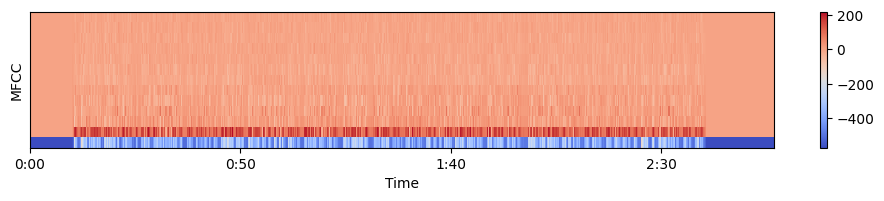

In [ ]:
file_path = "/kaggle/input/obama-dataset/audios/audios/obama000.wav"

# Extract the MFCC features
mfccs = extract_features(file_path)

plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfccs,  x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()